# 1. コード及び学習用データの取得

imageフォルダ -> 学習用の画像  
annotationsフォルダ -> annotation tool でアノテーションした結果

In [1]:
!git clone https://github.com/schiyoda/YOLOV3-Keras-Custom-GPU.git .

Cloning into '.'...
remote: Enumerating objects: 169, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 169 (delta 70), reused 167 (delta 68), pack-reused 0
Receiving objects: 100% (169/169), 6.46 MiB | 23.80 MiB/s, done.
Resolving deltas: 100% (70/70), done.


# 2. 学習済み重みデータの取得

学習済み重みデータbackend.h5を以下リンク先からダウンロード  
http://www.mediafire.com/file/l1b96fk7j18yi7v/backend.h5

右側Dataパネルでbackend.h5を追加した上で、"Insert to code"->"Insert Credentials"で Credentialを追加

In [3]:
from botocore.client import Config
import ibm_boto3

cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
    ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials_1['ENDPOINT'])

cos.download_file(Bucket=credentials_1['BUCKET'],Key=credentials_1['FILE'],Filename=credentials_1['FILE'])

# 3. 学習の実行

In [4]:
!pip install opencv-python-headless

    100% |████████████████████████████████| 18.8MB 2.7MB/s eta 0:00:01    56% |██████████████████▏             | 10.7MB 53.7MB/s eta 0:00:01
thinc 6.12.1 has requirement plac<1.0.0,>=0.9.6, but you'll have plac 1.0.0 which is incompatible.
spacy 2.0.18 has requirement plac<1.0.0,>=0.9.6, but you'll have plac 1.0.0 which is incompatible.
allennlp 0.7.2 has requirement torch<0.5.0,>=0.4.1, but you'll have torch 1.0.0 which is incompatible.


In [5]:
!python train.py -c config.json

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
not well-formed (invalid token): line 1, column 0
Ignore this bad annotation: annotations/.DS_Store
valid_annot_folder not exists. Spliting the trainining set.
Seen labels: 	{'watson_others': 48, 'watson': 31}

Given labels: 	['watson', 'watson_others']

Training on: 	['watson', 'watson_others']

2018-12-19 08:24:34.125986: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-12-19 08:24:34.338261: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:84

104/104 [==============================] - 75s 717ms/step - loss: 14.3247 - yolo_layer_1_loss: 4.5187 - yolo_layer_2_loss: 5.2952 - yolo_layer_3_loss: 4.5108

Epoch 00004: loss improved from 47.77128 to 14.32471, saving model to yolo.h5
Epoch 5/103
104/104 [==============================] - 74s 714ms/step - loss: 9.3162 - yolo_layer_1_loss: 2.7688 - yolo_layer_2_loss: 3.1759 - yolo_layer_3_loss: 3.3715

Epoch 00005: loss improved from 14.32471 to 9.31623, saving model to yolo.h5
Epoch 6/103
104/104 [==============================] - 79s 756ms/step - loss: 7.6359 - yolo_layer_1_loss: 2.3980 - yolo_layer_2_loss: 2.5722 - yolo_layer_3_loss: 2.6657

Epoch 00006: loss improved from 9.31623 to 7.63591, saving model to yolo.h5
Epoch 7/103
libpng warning: iCCP: known incorrect sRGB profile
104/104 [==============================] - 73s 703ms/step - loss: 7.3010 - yolo_layer_1_loss: 2.2888 - yolo_layer_2_loss: 2.4538 - yolo_layer_3_loss: 2.5583

Epoch 00007: loss improved from 7.63591 to 7.3009

104/104 [==============================] - 80s 770ms/step - loss: 6.7016 - yolo_layer_1_loss: 2.1945 - yolo_layer_2_loss: 2.3444 - yolo_layer_3_loss: 2.1628

Epoch 00008: loss improved from 7.30095 to 6.70161, saving model to yolo.h5
Epoch 9/103
104/104 [==============================] - 80s 767ms/step - loss: 6.1090 - yolo_layer_1_loss: 1.9912 - yolo_layer_2_loss: 2.2997 - yolo_layer_3_loss: 1.8181

Epoch 00009: loss improved from 6.70161 to 6.10897, saving model to yolo.h5
Epoch 10/103
104/104 [==============================] - 77s 739ms/step - loss: 5.5152 - yolo_layer_1_loss: 1.7368 - yolo_layer_2_loss: 2.0321 - yolo_layer_3_loss: 1.7463

Epoch 00010: loss improved from 6.10897 to 5.51516, saving model to yolo.h5
Epoch 11/103
104/104 [==============================] - 74s 709ms/step - loss: 5.4734 - yolo_layer_1_loss: 1.7729 - yolo_layer_2_loss: 2.0865 - yolo_layer_3_loss: 1.6140

Epoch 00011: loss improved from 5.51516 to 5.47341, saving model to yolo.h5
Epoch 12/103
104/104 [====

104/104 [==============================] - 73s 700ms/step - loss: 4.5200 - yolo_layer_1_loss: 1.3809 - yolo_layer_2_loss: 1.7992 - yolo_layer_3_loss: 1.3399

Epoch 00013: loss improved from 4.95558 to 4.51997, saving model to yolo.h5
Epoch 14/103
104/104 [==============================] - 76s 729ms/step - loss: 4.5628 - yolo_layer_1_loss: 1.4684 - yolo_layer_2_loss: 1.7280 - yolo_layer_3_loss: 1.3665

Epoch 00014: loss did not improve from 4.51997
Epoch 15/103
104/104 [==============================] - 71s 678ms/step - loss: 4.0981 - yolo_layer_1_loss: 1.2856 - yolo_layer_2_loss: 1.7861 - yolo_layer_3_loss: 1.0265

Epoch 00015: loss improved from 4.51997 to 4.09810, saving model to yolo.h5
libpng warning: iCCP: known incorrect sRGB profile
Epoch 16/103
104/104 [==============================] - 74s 713ms/step - loss: 4.1466 - yolo_layer_1_loss: 1.1276 - yolo_layer_2_loss: 1.6768 - yolo_layer_3_loss: 1.3422

Epoch 00016: loss did not improve from 4.09810
Epoch 17/103
 80/104 [==========

104/104 [==============================] - 78s 745ms/step - loss: 4.0847 - yolo_layer_1_loss: 1.3260 - yolo_layer_2_loss: 1.6424 - yolo_layer_3_loss: 1.1163

Epoch 00017: loss improved from 4.09810 to 4.08470, saving model to yolo.h5
Epoch 18/103
104/104 [==============================] - 77s 738ms/step - loss: 3.9997 - yolo_layer_1_loss: 1.3957 - yolo_layer_2_loss: 1.6167 - yolo_layer_3_loss: 0.9872

Epoch 00018: loss improved from 4.08470 to 3.99966, saving model to yolo.h5
Epoch 19/103
104/104 [==============================] - 77s 736ms/step - loss: 3.9304 - yolo_layer_1_loss: 1.1835 - yolo_layer_2_loss: 1.6127 - yolo_layer_3_loss: 1.1342

Epoch 00019: loss improved from 3.99966 to 3.93037, saving model to yolo.h5
Epoch 20/103
104/104 [==============================] - 72s 691ms/step - loss: 3.9170 - yolo_layer_1_loss: 1.1606 - yolo_layer_2_loss: 1.4535 - yolo_layer_3_loss: 1.3029

Epoch 00020: loss improved from 3.93037 to 3.91699, saving model to yolo.h5
Epoch 21/103
104/104 [===

104/104 [==============================] - 75s 720ms/step - loss: 3.6208 - yolo_layer_1_loss: 1.1701 - yolo_layer_2_loss: 1.4631 - yolo_layer_3_loss: 0.9876

Epoch 00022: loss improved from 3.91699 to 3.62076, saving model to yolo.h5
Epoch 23/103
104/104 [==============================] - 70s 676ms/step - loss: 3.4904 - yolo_layer_1_loss: 0.9313 - yolo_layer_2_loss: 1.5211 - yolo_layer_3_loss: 1.0379

Epoch 00023: loss improved from 3.62076 to 3.49040, saving model to yolo.h5
Epoch 24/103
104/104 [==============================] - 72s 689ms/step - loss: 3.5869 - yolo_layer_1_loss: 1.0247 - yolo_layer_2_loss: 1.5006 - yolo_layer_3_loss: 1.0616

Epoch 00024: loss did not improve from 3.49040
Epoch 25/103
libpng warning: iCCP: known incorrect sRGB profile
104/104 [==============================] - 72s 693ms/step - loss: 3.5871 - yolo_layer_1_loss: 1.1398 - yolo_layer_2_loss: 1.4663 - yolo_layer_3_loss: 0.9811

Epoch 00025: loss did not improve from 3.49040

Epoch 00025: ReduceLROnPlateau 

104/104 [==============================] - 77s 742ms/step - loss: 2.8004 - yolo_layer_1_loss: 0.9306 - yolo_layer_2_loss: 1.0118 - yolo_layer_3_loss: 0.8581

Epoch 00026: loss improved from 3.49040 to 2.80042, saving model to yolo.h5
Epoch 27/103
104/104 [==============================] - 85s 816ms/step - loss: 2.4022 - yolo_layer_1_loss: 0.7109 - yolo_layer_2_loss: 0.9046 - yolo_layer_3_loss: 0.7867

Epoch 00027: loss improved from 2.80042 to 2.40217, saving model to yolo.h5
Epoch 28/103
104/104 [==============================] - 75s 723ms/step - loss: 2.2532 - yolo_layer_1_loss: 0.5922 - yolo_layer_2_loss: 0.8928 - yolo_layer_3_loss: 0.7681

Epoch 00028: loss improved from 2.40217 to 2.25317, saving model to yolo.h5
Epoch 29/103
104/104 [==============================] - 73s 702ms/step - loss: 2.4762 - yolo_layer_1_loss: 0.6162 - yolo_layer_2_loss: 0.9367 - yolo_layer_3_loss: 0.9233

Epoch 00029: loss did not improve from 2.25317
Epoch 30/103
104/104 [==============================] 

104/104 [==============================] - 73s 702ms/step - loss: 2.1906 - yolo_layer_1_loss: 0.5444 - yolo_layer_2_loss: 0.9148 - yolo_layer_3_loss: 0.7314

Epoch 00031: loss improved from 2.25317 to 2.19058, saving model to yolo.h5
Epoch 32/103
104/104 [==============================] - 75s 726ms/step - loss: 1.9045 - yolo_layer_1_loss: 0.5057 - yolo_layer_2_loss: 0.8189 - yolo_layer_3_loss: 0.5799

Epoch 00032: loss improved from 2.19058 to 1.90452, saving model to yolo.h5
Epoch 33/103
104/104 [==============================] - 70s 678ms/step - loss: 2.4213 - yolo_layer_1_loss: 0.5593 - yolo_layer_2_loss: 0.8743 - yolo_layer_3_loss: 0.9878

Epoch 00033: loss did not improve from 1.90452
Epoch 34/103
104/104 [==============================] - 76s 734ms/step - loss: 2.1411 - yolo_layer_1_loss: 0.4603 - yolo_layer_2_loss: 0.8555 - yolo_layer_3_loss: 0.8253

Epoch 00034: loss did not improve from 1.90452

Epoch 00034: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Ep

104/104 [==============================] - 77s 739ms/step - loss: 2.2096 - yolo_layer_1_loss: 0.5752 - yolo_layer_2_loss: 0.7447 - yolo_layer_3_loss: 0.8897

Epoch 00035: loss did not improve from 1.90452
Epoch 36/103
104/104 [==============================] - 75s 718ms/step - loss: 2.0318 - yolo_layer_1_loss: 0.5724 - yolo_layer_2_loss: 0.8244 - yolo_layer_3_loss: 0.6349

Epoch 00036: loss did not improve from 1.90452

Epoch 00036: ReduceLROnPlateau reducing learning rate to 1.0000000116860975e-08.
Epoch 37/103
104/104 [==============================] - 79s 761ms/step - loss: 2.3945 - yolo_layer_1_loss: 0.6091 - yolo_layer_2_loss: 0.9114 - yolo_layer_3_loss: 0.8740

Epoch 00037: loss did not improve from 1.90452
Epoch 00037: early stopping
watson: 0.8214
watson_others: 0.8600
mAP: 0.8407


# 4. 物体検出の結果表示

In [6]:
# テスト画像の取得
!wget http://www.internetman.jp/main/wp-content/uploads/2016/03/Watson-0218-01-1024x594.jpg -O test.jpg

--2018-12-19 09:14:50--  http://www.internetman.jp/main/wp-content/uploads/2016/03/Watson-0218-01-1024x594.jpg
Resolving www.internetman.jp (www.internetman.jp)... 103.15.186.10
Connecting to www.internetman.jp (www.internetman.jp)|103.15.186.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126792 (124K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 123.82K   177KB/s    in 0.7s    

2018-12-19 09:14:51 (177 KB/s) - ‘test.jpg’ saved [126792/126792]



In [7]:
!python predict.py -c config.json -i test.jpg

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
2018-12-19 09:15:03.374601: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2018-12-19 09:15:03.578998: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1432] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:84:00.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-12-19 09:15:03.579042: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1511] Adding visible gpu devices: 0
2018-12-19 09:15:03.938965: I tensorflow/core/common_runtime/gpu/gpu_device.cc:982] Device interconnect StreamExecutor with strength 1

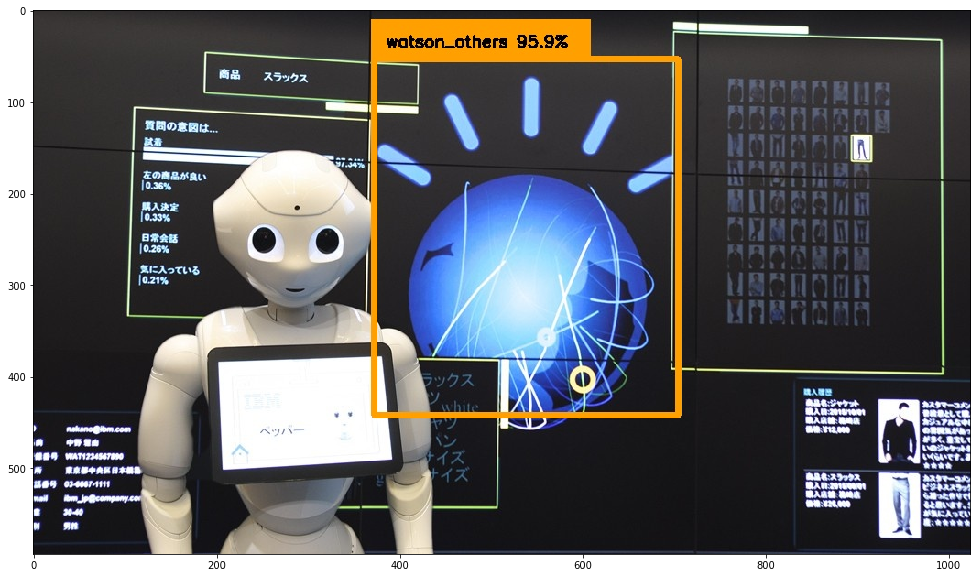

In [8]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('output/test.jpg')
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))